In [1]:
# 1. 필요 모듈 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# 2. cuda 사용여부 확인
torch.cuda.is_available()

True

In [3]:
# 3. CNN모델 만들어보기 
model = nn.Sequential(
    # 첫번째 컨볼루션 레이어
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # 두번째 컨볼루션 레이어
    nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Flatten 레이어 - 전부 풀어서 1차원으로 변환
    nn.Flatten(),

    # 완전 연결 계층
    nn.Linear(32 * 7 * 7, 120),
    nn.ReLU(),
    nn.Linear(120, 10)
)

In [4]:
### 4. 모델시각화 해보기

In [5]:
### 5. 모델 학습시키기
# 5-1 데이터가져오기
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

# 학습 데이터셋 가져오기
batch_size = 64
train_dataset = datasets.MNIST(root="../data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="../data", train=False, download=True, transform=transform)
test_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

In [6]:
images, labels = next(iter(test_loader))
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

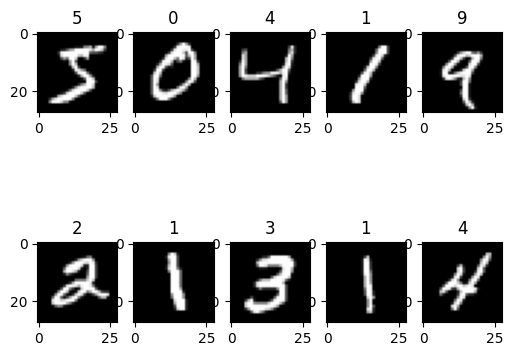

In [7]:
# 5-2 데이터 시각화 해보기
import matplotlib.pyplot as plt

images, labels = next(iter(test_loader))
plt.figure(figsize=(6,5))
for x in range(10):
    plt.subplot(2,5,x+1)
    plt.imshow(images[x].squeeze(), cmap='gray')
    plt.title(f"{labels[x].item()}")
plt.show()

In [8]:
# 5-3 손실함수와 옵티마이저 설정
import torch.optim as optim

# 손실함수 - 다중분류
criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# 5-4 모델 학습하기
epochs = 10
device = torch.device("cuda")
model.to(device) # gpu 로 모델 보내기

for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device) # 데이터를 gpu로 옮기기

        optimizer.zero_grad()
        outputs = model(inputs) # 순전파
        loss = criterion(outputs, labels)
        loss.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
    print(f"Epoch 마다 {epoch}, Loss 값은 : {loss}")

Epoch 마다 0, Loss 값은 : 0.04292730614542961
Epoch 마다 1, Loss 값은 : 0.1568513810634613
Epoch 마다 2, Loss 값은 : 0.028703982010483742
Epoch 마다 3, Loss 값은 : 0.00027837356901727617
Epoch 마다 4, Loss 값은 : 0.0006160314660519361
Epoch 마다 5, Loss 값은 : 0.0035928322467952967
Epoch 마다 6, Loss 값은 : 0.0006329003954306245
Epoch 마다 7, Loss 값은 : 0.0005940205883234739
Epoch 마다 8, Loss 값은 : 0.0042922780849039555
Epoch 마다 9, Loss 값은 : 4.2205003410344943e-05


In [10]:
# 5-5 모델 평가하기
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device) # 데이터를 gpu로 옮기기
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    print(f"모델의 정확도: {(correct/total):.2%}")

모델의 정확도: 99.80%


In [11]:
images, labels = next(iter(test_loader))
print(images.shape)

torch.Size([64, 1, 28, 28])


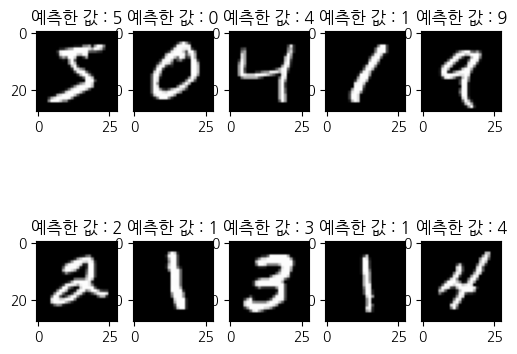

In [12]:
# 예측이 잘 되었는 시각화 
import koreanize_matplotlib
plt.figure(figsize=(6,5))
for x in range(10):
    image = images[x].unsqueeze(0).to(device)
    pred = model(image)
    _, pred = torch.max(pred.data, 1)
    plt.subplot(2,5,x+1)
    plt.imshow(images[x].squeeze(), cmap='gray')
    plt.title(f"예측한 값 : {pred.item()}")
plt.show()